In [59]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# Files to Load 
listings_final= "listings_final.csv"


In [80]:
#read in csv
og_df = pd.read_csv('listings_final.csv')
print(og_df.head())

       id                                   name  \
0    3686                        Vita's Hideaway   
1  196429    Takoma Garden apt-Lush yard,pets ok   
2  198685      Private room in central location.   
3  201116    Victorian Haven - Private Basement!   
4  204741  1-Suburbia in the City--Best Value!!!   

                                         description  \
0  IMPORTANT NOTES<br />* Carefully read and be s...   
1  Private Garden apt in SF home with Full size b...   
2  Welcome, I'm happy to share my home with you. ...   
3  <b>The space</b><br />Come stay with us in my ...   
4  Budget-friendly room in a working-class neighb...   

                           listing_url  \
0    https://www.airbnb.com/rooms/3686   
1  https://www.airbnb.com/rooms/196429   
2  https://www.airbnb.com/rooms/198685   
3  https://www.airbnb.com/rooms/201116   
4  https://www.airbnb.com/rooms/204741   

                               neighborhood_overview  \
0  We love that our neighborhood is up an

In [81]:
og_df.columns

Index(['id', 'name', 'description', 'listing_url', 'neighborhood_overview',
       'picture_url', 'neighbourhood', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'license'],
      dtype='object')

In [82]:
# group by neighborhood, get mean and median price
grouped_df = og_df.groupby('neighbourhood_cleansed')['price'].agg(['mean', 'median']).reset_index()
grouped_df = grouped_df.sort_values(by='mean', ascending=False)
grouped_df

,neighbourhood_cleansed,mean,median
29,"Shaw, Logan Circle",319.809524,125.0
31,"Southwest Employment Area, Southwest/Waterfron...",258.149643,190.0
17,"Georgetown, Burleith/Hillandale",256.483721,166.0
4,"Cathedral Heights, McLean Gardens, Glover Park",238.631579,100.0
36,"West End, Foggy Bottom, GWU",228.063291,140.0
6,"Colonial Village, Shepherd Park, North Portal ...",226.360000,99.0
28,"River Terrace, Benning, Greenway, Dupont Park",217.291667,88.5
18,"Hawthorne, Barnaby Woods, Chevy Chase",201.392857,108.5
5,"Cleveland Park, Woodley Park, Massachusetts Av...",197.345455,109.0
12,"Dupont Circle, Connecticut Avenue/K Street",187.525988,130.0


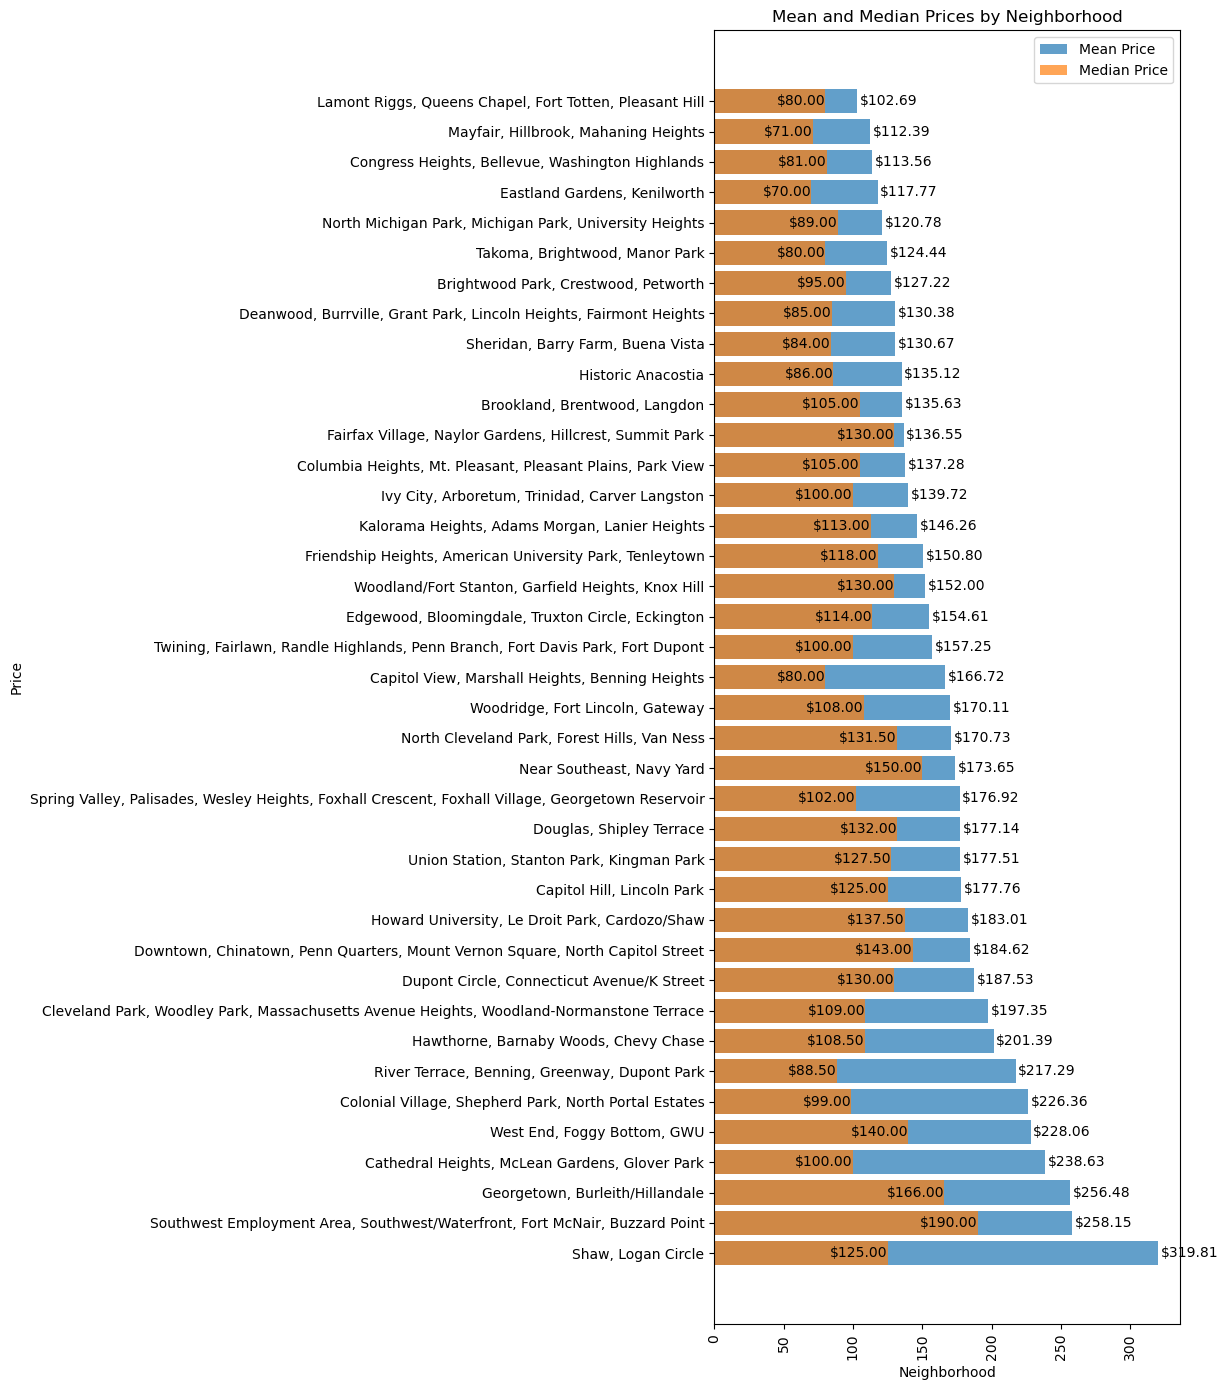

In [30]:
# plot mean and median price by
plt.figure(figsize=(12, 14))
plt.barh(grouped_df['neighbourhood_cleansed'], grouped_df['mean'], label='Mean Price', alpha=0.7)
plt.barh(grouped_df['neighbourhood_cleansed'], grouped_df['median'], label='Median Price', alpha=0.7)

plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Mean and Median Prices by Neighborhood')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Place xticks on top of each bar
for index, (mean_value, median_value) in enumerate(zip(grouped_df['mean'], grouped_df['median'])):
    plt.text(median_value, index, f'${median_value:.2f}', va='center', multialignment='center', ha='right')
    plt.text(mean_value + 2, index, f'${mean_value:.2f}', va='center', multialignment='center')


# Show the plot
plt.show()

In [31]:
#Property Type
# uniques room_type
print(len(og_df.room_type.unique()))
print(og_df.room_type.unique())
og_df.room_type.value_counts()

4
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


Entire home/apt    4637
Private room       1463
Shared room          96
Hotel room           21
Name: room_type, dtype: int64

In [32]:
# uniques property_type
print(len(og_df.property_type.unique()))
print(og_df.property_type.unique())

44
['Private room in home' 'Entire guest suite' 'Private room in townhouse'
 'Entire rental unit' 'Private room in condo' 'Entire townhouse'
 'Entire home' 'Entire condo' 'Entire guesthouse'
 'Private room in rental unit' 'Private room in guest suite'
 'Entire serviced apartment' 'Private room in bed and breakfast'
 'Shared room in home' 'Entire loft' 'Entire bungalow'
 'Shared room in rental unit' 'Floor' 'Room in serviced apartment'
 'Tiny home' 'Private room in loft' 'Private room in guesthouse'
 'Private room in bungalow' 'Room in boutique hotel'
 'Shared room in townhouse' 'Entire place' 'Room in hostel'
 'Room in bed and breakfast' 'Shared room in guesthouse' 'Entire cottage'
 'Shared room in hostel' 'Room in hotel' 'Shared room in hotel'
 'Private room in hostel' 'Camper/RV' 'Houseboat' 'Private room in resort'
 'Shared room in loft' 'Room in aparthotel'
 'Private room in casa particular' 'Entire vacation home'
 'Casa particular' 'Private room' 'Private room in serviced apartmen

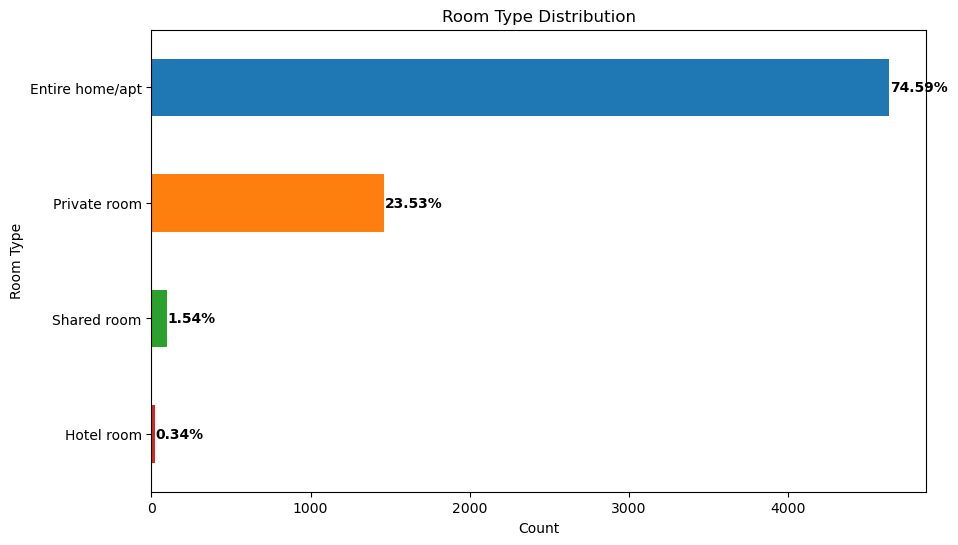

In [33]:
# Get the value counts for room_type
room_type_counts = og_df['room_type'].value_counts()

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = room_type_counts.plot(kind='barh', color=colors)
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.title('Room Type Distribution')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top

# Add percent of total at the end of each bar
for i, v in enumerate(room_type_counts):
    percent = (v / room_type_counts.sum()) * 100
    ax.text(v + 5, i, f'{percent:.2f}%', va='center', color='black', fontweight='bold')

plt.show()


In [34]:
# Create a DataFrame with property_type counts
property_type_counts = og_df.property_type.value_counts().reset_index()
property_type_counts.columns = ["Property Type", "Count"]

# Calculate the percent of total
property_type_counts["% of Total"] = (property_type_counts["Count"] / property_type_counts["Count"].sum()) * 100

# Sort the DataFrame by count in descending order
property_type_counts = property_type_counts.sort_values(by="Count", ascending=False)

# Reset the index
property_type_counts.reset_index(drop=True, inplace=True)

# Format the "Percent of Total" column to two decimal places
property_type_counts["% of Total"] = property_type_counts["% of Total"].map("{:.2f}%".format)

# convert to dataframe and print
property_type_df = pd.DataFrame(property_type_counts)
property_type_df

,Property Type,Count,% of Total
0,Entire rental unit,2166,34.84%
1,Entire home,651,10.47%
2,Private room in home,508,8.17%
3,Entire townhouse,508,8.17%
4,Entire condo,474,7.62%
5,Entire guest suite,446,7.17%
6,Private room in townhouse,303,4.87%
7,Private room in rental unit,302,4.86%
8,Entire serviced apartment,258,4.15%
9,Room in boutique hotel,109,1.75%


In [35]:
#Listed or Not
# uniques license
# strip actual license numbers to group licensed operators
license_df = og_df.copy()
license_df['license'] = license_df['license'].str.split(':').str[0]

print(len(license_df.license.unique()))
print(license_df.license.unique())
value_count = license_df.license.value_counts(dropna=False)
print(f'Total: {value_count.sum()}')

# Create a pandas DataFrame for the value counts
value_counts_df = pd.DataFrame({'License Type': license_df.license.unique(), 'Count': value_count}).reset_index(drop=True)

# Print the value counts DataFrame
value_counts_df

10
[nan 'Hosted License' 'Exempt' 'Unhosted License' '07844-2020-0'
 '47-3532490' 'HOU-0286-2022-STR-H' 'HOU-0046-2022-STR-H'
 'Hou-0046-2022-STR-H' 'HOU-0304-2022-STR-H']
Total: 6217


,License Type,Count
0,NaN,2844
1,Hosted License,2190
2,Exempt,987
3,Unhosted License,189
4,07844-2020-0,2
5,47-3532490,1
6,HOU-0286-2022-STR-H,1
7,HOU-0046-2022-STR-H,1
8,Hou-0046-2022-STR-H,1
9,HOU-0304-2022-STR-H,1


In [36]:
# drop misc
value_counts_df = value_counts_df.iloc[:4]
value_counts_df['License Type'].fillna('Unlicensed', inplace=True)
value_counts_df


C:\Users\polska2207\AppData\Local\Temp\ipykernel_25984\2878554145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_counts_df['License Type'].fillna('Unlicensed', inplace=True)


,License Type,Count
0,Unlicensed,2844
1,Hosted License,2190
2,Exempt,987
3,Unhosted License,189


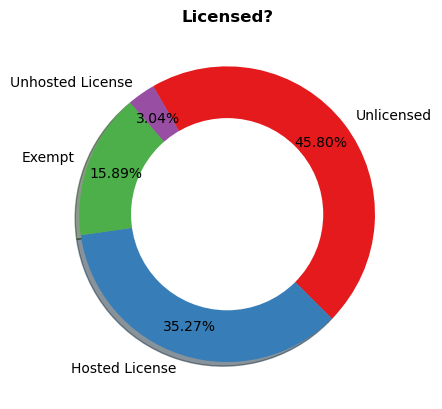

In [37]:
# donut chart
import seaborn as sns

# cmap = plt.cm.get_cmap('tab20c', 4)
# colors = cmap.colors
colors = sns.color_palette("Set1", n_colors=4)
# colors = sns.color_palette("pastel", n_colors=4)
# colors = sns.color_palette("Accent", n_colors=4)
# colors = sns.color_palette("tab10", n_colors=4) # the default


# Plot the pie chart
plt.pie(
    value_counts_df['Count'],
    labels=value_counts_df['License Type'],
    # explode=(0.03, 0.15, 0.03, 0.03),
    colors=colors,
    shadow=True,
    startangle=120,
    autopct="%1.2f%%",
    pctdistance=0.8,
    counterclock=False,
)

# Add title
plt.title("Licensed?", fontweight="bold")

# Add a donut hole
donut = plt.Circle((0, 0), 0.65, facecolor="white")
plt.gcf().gca().add_artist(donut)

# Show the plot
plt.show()

In [64]:
#Ratings Distribution
og_reviews_df = pd.read_csv('listing_reviews_final.csv')
og_reviews_df.head()

,id,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value
0,3686,81,4,0,2010-11-01,2022-07-06,4.63,4.72,4.43,4.90,4.83,3.86,0.55,4.62
1,196429,7,1,0,2013-04-23,2022-04-01,4.20,4.40,4.20,5.00,5.00,4.60,0.06,4.20
2,198685,154,14,0,2011-09-03,2022-10-27,4.72,4.79,4.52,4.78,4.82,4.45,1.12,4.68
3,201116,220,25,0,2011-09-16,2022-07-04,4.49,4.58,4.40,4.75,4.81,4.84,1.60,4.55
4,204741,116,2,0,2011-09-16,2022-06-23,4.59,4.69,4.66,4.67,4.66,3.75,0.85,4.62


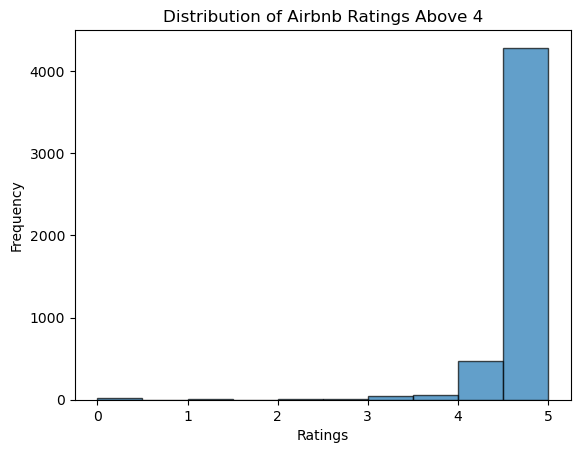

In [65]:
# Create a histogram
plt.hist(og_reviews_df.review_scores_rating, bins=10, edgecolor='k', alpha=0.7)

# Set labels and title
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Ratings Above 4')

# Show the plot
plt.show()


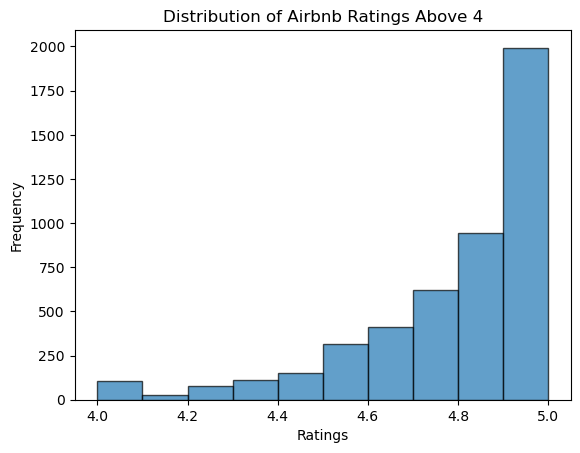

In [66]:
# drop miniscule number of ratings below 4
reviews_df = og_reviews_df[og_reviews_df.review_scores_rating >= 4]

# Create a histogram
plt.hist(reviews_df.review_scores_rating, bins=10, edgecolor='k', alpha=0.7)

# Set labels and title
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Ratings Above 4')

# Show the plot
plt.show()

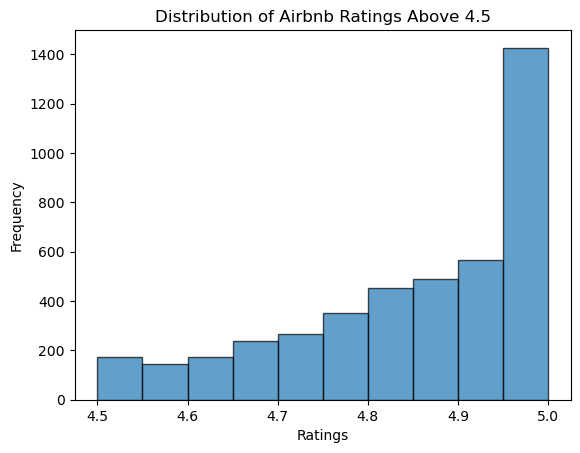

In [67]:
# drop miniscule number of ratings below 4
reviews_df = reviews_df[reviews_df.review_scores_rating >= 4.5]

# Create a histogram
plt.hist(reviews_df.review_scores_rating, bins=10, edgecolor='k', alpha=0.7)

# Set labels and title
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Ratings Above 4.5')

# Show the plot
plt.show()

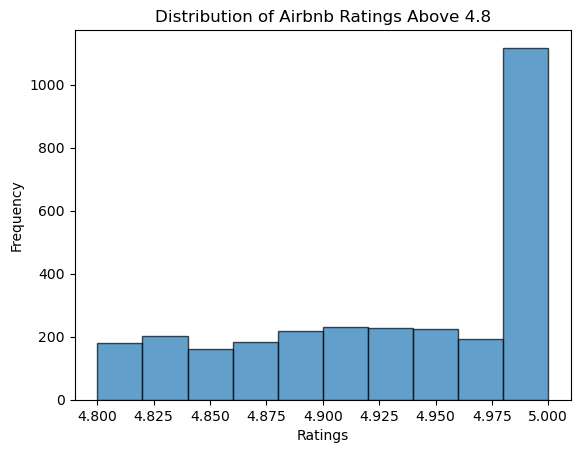

In [68]:
# drop miniscule number of ratings below 4
reviews_df = reviews_df[reviews_df.review_scores_rating >= 4.8]

# Create a histogram
plt.hist(reviews_df.review_scores_rating, bins=10, edgecolor='k', alpha=0.7)

# Set labels and title
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Ratings Above 4.8')

# Show the plot
plt.show()

In [69]:
#Washington, DC Overall Stats
# print out summary stats for price, rating, and property type (which is room_type)
print(f"Mean Price: ${og_df.price.mean():.2f}")
print(f"Median Price: ${og_df.price.median():.2f}")
print(f"Max Price: ${og_df.price.max():.2f}")
print(f"Min Price: ${og_df[og_df.price >0].price.min():.2f}")
print()
print(f"Overall Mean Rating: {og_reviews_df.review_scores_rating.mean():.3f} ★")
print(f"Overall Median Rating: {og_reviews_df.review_scores_rating.median():.3f} ★")
print()

room_type_means = og_df.groupby('room_type').price.mean()
room_type_medians = og_df.groupby('room_type').price.median()
room_type_mins = og_df.groupby('room_type').price.min()
room_type_maxs = og_df.groupby('room_type').price.max()

for room_type, mean_price, median_price, min_price, max_price in zip(
    room_type_means.index, room_type_means, room_type_medians, room_type_mins, room_type_maxs
):
    print(f"    Room Type: {room_type}")
    print(f"Mean Price: ${mean_price:.2f}")
    print(f"Median Price: ${median_price:.2f}")
    print(f"Min Price: ${min_price:.2f}")
    print(f"Max Price: ${max_price:.2f}")


Mean Price: $178.20
Median Price: $119.00
Max Price: $51534.00
Min Price: $10.00

Overall Mean Rating: 4.718 ★
Overall Median Rating: 4.850 ★

    Room Type: Entire home/apt
Mean Price: $187.00
Median Price: $132.00
Min Price: $10.00
Max Price: $7500.00
    Room Type: Hotel room
Mean Price: $47.10
Median Price: $25.00
Min Price: $0.00
Max Price: $321.00
    Room Type: Private room
Mean Price: $160.79
Median Price: $80.00
Min Price: $15.00
Max Price: $51534.00
    Room Type: Shared room
Mean Price: $47.18
Median Price: $45.00
Min Price: $16.00
Max Price: $140.00


In [70]:
# print top three max prices per property type (which is room_type)
top_three_max_prices = og_df.groupby('room_type').price.nlargest(3)

for room_type, max_price in top_three_max_prices.reset_index().groupby('room_type').price:
    print(f"Room Type: {room_type}")
    for price in max_price:
        print(f"Max Price: ${price:.2f}")
    print("---")

Room Type: Entire home/apt
Max Price: $7500.00
Max Price: $5995.00
Max Price: $5000.00
---
Room Type: Hotel room
Max Price: $321.00
Max Price: $111.00
Max Price: $95.00
---
Room Type: Private room
Max Price: $51534.00
Max Price: $10000.00
Max Price: $2000.00
---
Room Type: Shared room
Max Price: $140.00
Max Price: $120.00
Max Price: $100.00
---


In [73]:
# Hosts
# read in csv
hosts_df = pd.read_csv('host_final.csv')
hosts_df

,host_id,id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,4645,3686,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington, DC","I am a literary scholar, teacher, poet, vegan ...",NaN,NaN,100%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t
1,956417,196429,https://www.airbnb.com/users/show/956417,Julia,2011-08-11,"Washington, DC",Professional Mom welcomes you to our home wher...,NaN,NaN,75%,f,https://a0.muscache.com/im/users/956417/profil...,https://a0.muscache.com/im/users/956417/profil...,Takoma,1,6,"['email', 'phone']",t,t
2,966613,198685,https://www.airbnb.com/users/show/966613,Robin,2011-08-13,"Washington, DC",I'm 41 and have daughter in college. Living an...,a few days or more,0%,61%,f,https://a0.muscache.com/im/pictures/user/cfe96...,https://a0.muscache.com/im/pictures/user/cfe96...,Old Soldiers' Home,1,5,"['email', 'phone']",t,t
3,983611,201116,https://www.airbnb.com/users/show/983611,Reed,2011-08-17,"Washington, DC","Honest, friendly, fun, caring... I love people...",NaN,NaN,94%,f,https://a0.muscache.com/im/users/983611/profil...,https://a0.muscache.com/im/users/983611/profil...,Takoma,1,1,"['email', 'phone']",t,t
4,1005751,204741,https://www.airbnb.com/users/show/1005751,Denise,2011-08-22,"Washington, DC","Fun-loving, adventurous, well-traveled. I spe...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/a0d6b...,https://a0.muscache.com/im/pictures/user/a0d6b...,Washington Highlands,3,3,"['email', 'phone', 'work_email']",t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,117099,27281,https://www.airbnb.com/users/show/117099,Stephen,2010-05-02,"Gaziantep, Turkey",Active family of four. We have been in DC for...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/117099/profil...,https://a0.muscache.com/im/users/117099/profil...,Near Northeast,2,4,"['email', 'phone']",t,t
3290,301975,62122,https://www.airbnb.com/users/show/301975,Sarah (And JT),2010-11-27,"Washington, DC","Hi I'm Sarah and my husband, JT, and I have be...",within an hour,100%,93%,t,https://a0.muscache.com/im/pictures/user/12f65...,https://a0.muscache.com/im/pictures/user/12f65...,NaN,1,1,"['email', 'phone']",t,t
3291,332901,67483,https://www.airbnb.com/users/show/332901,Chris And Shawanda,2011-01-02,"Washington, DC","Hi, we're Chris and Shawanda. Chris is a renew...",within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/24bca...,https://a0.muscache.com/im/pictures/user/24bca...,Columbia Heights,1,1,"['email', 'phone', 'work_email']",t,t
3292,723470,150109,https://www.airbnb.com/users/show/723470,Steffanie,2011-06-20,"Washington, DC","Hi,\r\n\r\nI am a television producer with a l...",within a few hours,100%,50%,f,https://a0.muscache.com/im/users/723470/profil...,https://a0.muscache.com/im/users/723470/profil...,U Street Corridor,1,1,"['email', 'phone']",t,t


In [74]:
# uniques host_
print(len(hosts_df.host_identity_verified.unique()))
print(hosts_df.host_identity_verified.unique())
value_counts = hosts_df.host_identity_verified.value_counts(dropna=False)
print(value_counts)

# calculate percentages
percent_t = (value_counts['t'] / len(hosts_df)) * 100
percent_f = (value_counts['f'] / len(hosts_df)) * 100
print(f"Percentage of 't' values: {percent_t:.2f}%")
print(f"Percentage of 'f' values: {percent_f:.2f}%")

2
['t' 'f']
t    2675
f     619
Name: host_identity_verified, dtype: int64
Percentage of 't' values: 81.21%
Percentage of 'f' values: 18.79%


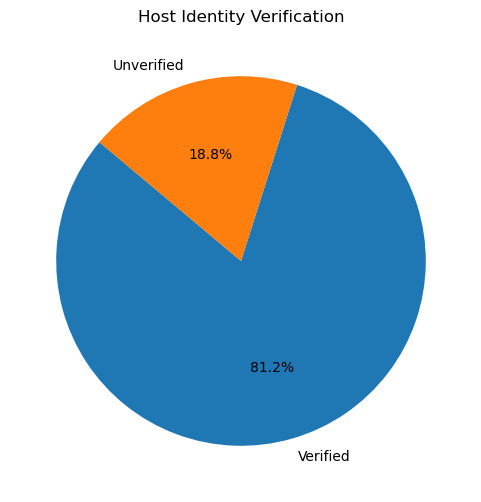

In [75]:
labels = ['Verified', 'Unverified']
sizes = [percent_t, percent_f]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Host Identity Verification')
# plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Display the pie chart
plt.show()


In [76]:
print(len(hosts_df.host_verifications.unique()))
print(hosts_df.host_verifications.unique())
hosts_df.host_verifications.value_counts(dropna=False)

5
["['email', 'phone', 'work_email']" "['email', 'phone']" "['phone']"
 "['phone', 'work_email']" "['email']"]


['email', 'phone']                  2543
['email', 'phone', 'work_email']     511
['phone']                            228
['phone', 'work_email']               11
['email']                              1
Name: host_verifications, dtype: int64